### Import Library yang di perlukan

In [1]:
import pandas as pd
import numpy as np

### Load data

In [10]:
data = pd.read_csv('/content/Dataset/crypto_data_coinmarketcap.csv')

### Memilih  Kriteria untuk Dianalisi disini saya memilih :
### - current_price(Harga)
### - price_change_percentage_24h(Perubahan Harga 24jam dalam %)
### - market_cap
### - total_volume(Volume penjualan dalam 24 jam)

In [11]:
criteria = ['current_price', 'price_change_percentage_24h', 'market_cap', 'total_volume']

### menentukan bobot Kriteria

In [12]:
weights = {
    'current_price': 0.3,
    'price_change_percentage_24h': 0.2,
    'market_cap': 0.3,
    'total_volume': 0.2
}

### Menormalisasikan Data

In [13]:
def normalize(column, weight, is_benefit=True):
    if is_benefit:
        return weight * (column - column.min()) / (column.max() - column.min())
    else:
        return weight * (column.max() - column) / (column.max() - column.min())

### Menerapkan Metode SAW

In [14]:
def apply_saw(data, criteria, weights):
    normalized_data = pd.DataFrame()

    for criterion in criteria:
        if criterion in ['current_price', 'market_cap', 'total_volume']:
            normalized_data[criterion] = normalize(data[criterion], weights[criterion])
        else:
            # For price_change_percentage_24h, higher is better
            normalized_data[criterion] = normalize(data[criterion], weights[criterion])

    # Calculate total score
    data['saw_score'] = normalized_data.sum(axis=1)

    # Sort by score in descending order
    return data.sort_values('saw_score', ascending=False)

### Menerapkan SAW ke Data

In [15]:
result = apply_saw(data, criteria, weights)

### Menampilkan 10 Skor Tertinggi

In [16]:
print(result[['name', 'saw_score'] + criteria].head(10))

            name  saw_score  current_price  price_change_percentage_24h  \
0        Bitcoin   0.744776   62201.753296                     1.405299   
2    Tether USDt   0.252301       1.000027                     0.017244   
59  Popcat (SOL)   0.200971       1.239876                    25.469613   
1       Ethereum   0.172846    2418.448194                     1.648257   
22     Bittensor   0.114934     584.679466                    12.554282   
70     Worldcoin   0.113456       1.859584                    12.883217   
37     dogwifhat   0.082572       2.332121                     8.137913   
61        MANTRA   0.082523       1.370582                     8.513367   
73      Wormhole   0.080142       0.342173                     8.045314   
81       Conflux   0.076083       0.173689                     7.575527   

      market_cap  total_volume  
0   1.229315e+12  2.559007e+10  
2   1.196452e+11  4.573764e+10  
59  1.215045e+09  1.884489e+08  
1   2.911213e+11  1.273587e+10  
22  4.315

### Memvisualisasikan Hasil

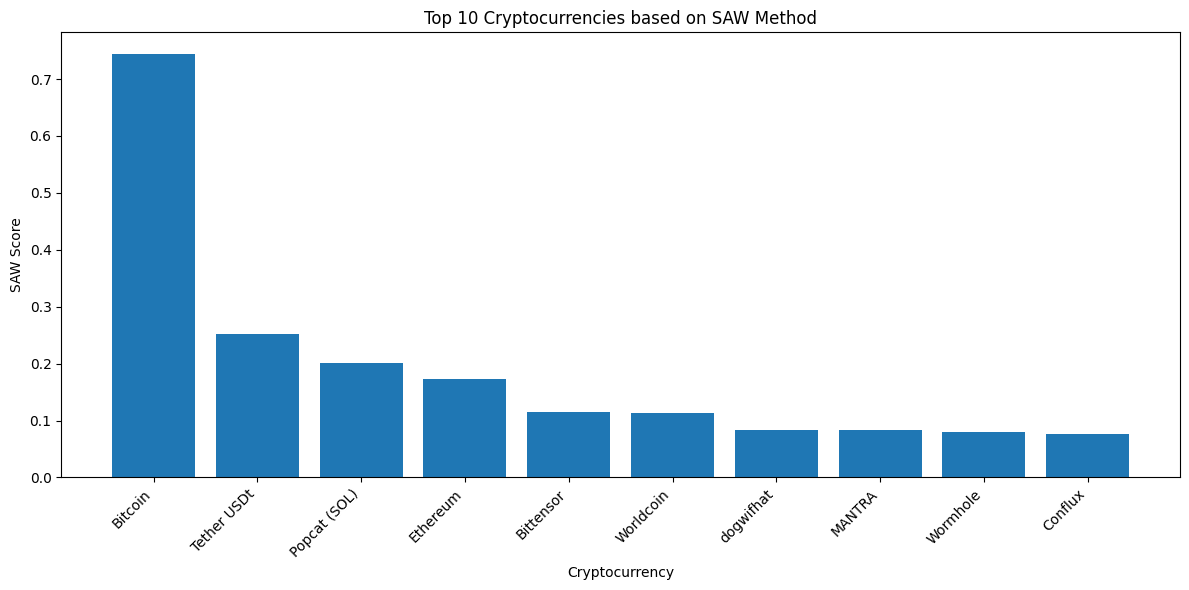

In [17]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
plt.bar(result['name'].head(10), result['saw_score'].head(10))
plt.title('Top 10 Cryptocurrencies based on SAW Method')
plt.xlabel('Cryptocurrency')
plt.ylabel('SAW Score')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()